In [1]:
import os
import networkx as nx
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
from ogb.nodeproppred import NodePropPredDataset
from dataset import get_ogb_data


In [16]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [3]:
d_name = 'arxiv'
data, split_idx, num_classes = get_ogb_data('arxiv')

Number of nodes in the graph: 169343
Number of edges in the graph: 1166243
Number of training nodes: 90941
Number of validation nodes: 29799
Number of test nodes: 48603
Node feature matrix with shape: torch.Size([169343, 128])
Graph connectivity in COO format with shape: torch.Size([2, 1166243])
Target to train against : torch.Size([169343, 1])
Node feature length 128
number of target categories: 40


In [4]:
test_idx = split_idx['test']
G = nx.DiGraph()
G.add_nodes_from(test_idx.numpy())
G.add_edges_from(data.edge_index.T.tolist())

In [5]:
score_funcs_list = [(nx.centrality.degree_centrality, 'degree_centrality'), (nx.centrality.eigenvector_centrality, 'eigenvector_centrality'), 
                    (nx.centrality.katz_centrality, 'katz_centrality')]

In [6]:
scores_df = pd.DataFrame(list(G.nodes()), columns=['node_id'])
for cent_func, cent_name in score_funcs_list:
    print(cent_name)
    cent_func_stats = cent_func(G)
    temp_scores_df = pd.DataFrame(cent_func_stats.items(), columns=['node_id', cent_name])
    scores_df = scores_df.merge(temp_scores_df, on='node_id')
    
    

degree_centrality
eigenvector_centrality
katz_centrality


In [9]:
scores_df

,node_id,degree_centrality,eigenvector_centrality,katz_centrality
0,346,0.000041,3.673771e-09,0.000012
1,398,0.000024,6.022584e-21,0.000010
2,451,0.000065,1.095015e-22,0.000008
3,480,0.000035,3.746047e-19,0.000010
4,488,0.000035,1.300670e-15,0.000009
...,...,...,...,...
169338,32062,0.000006,2.080529e-21,0.000008
169339,158530,0.000006,2.080529e-21,0.000008
169340,62086,0.000006,2.080529e-21,0.000008
169341,43314,0.000006,2.080529e-21,0.000008


In [4]:
# centrality_scores = pd.read_csv('scores.csv', index_col=0)

In [10]:
centrality_scores = scores_df

In [11]:
depth_classes_df = pd.read_csv('id_to_depth_class.csv', index_col=0)

In [12]:
nodes_df = pd.merge(left=centrality_scores, right=depth_classes_df,
                    left_on='node_id', right_on='id')

In [13]:
nodes_df['katz_centrality'].min()

7.703269388798389e-06

/tmp/ipykernel_560748/2650511349.py:1: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.kdeplot(data=nodes_df, x="katz_centrality", hue="class", log_scale=(True, True), palette=sns.color_palette() )


<AxesSubplot:xlabel='katz_centrality', ylabel='Density'>

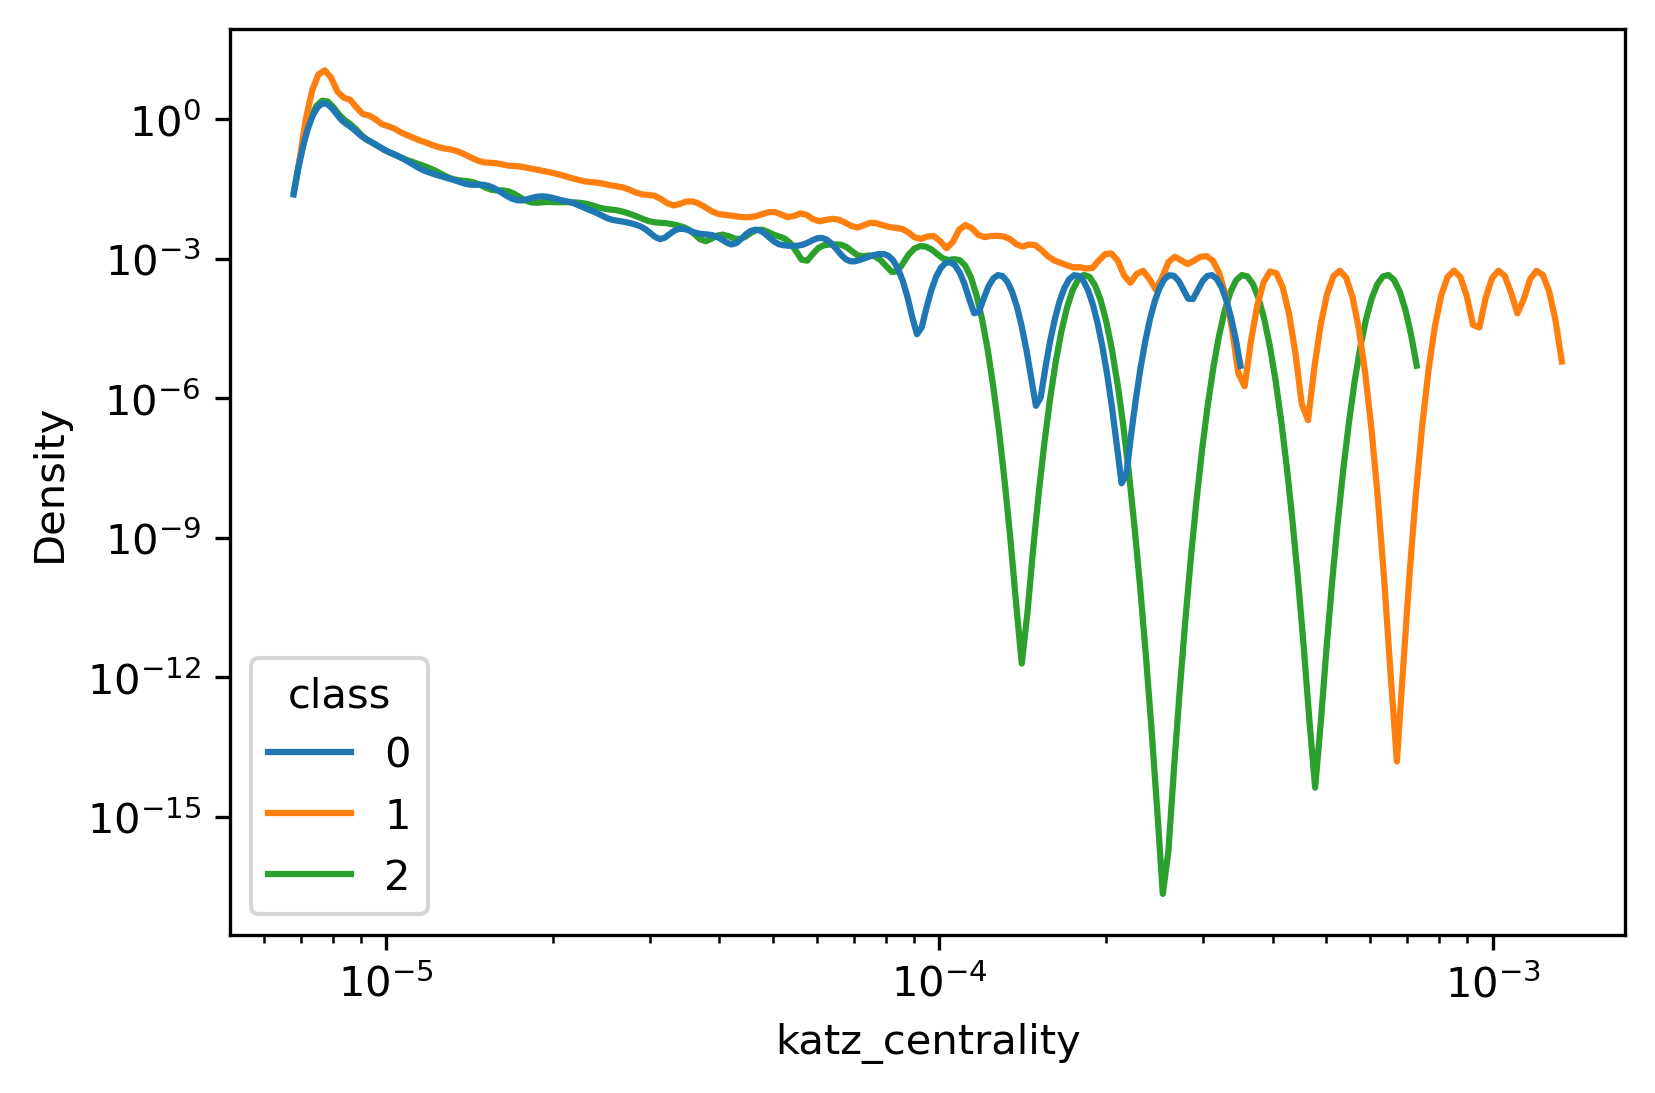

In [18]:
sns.kdeplot(data=nodes_df, x="katz_centrality", hue="class", log_scale=(True, True), palette=sns.color_palette() )
# plt.xlim(0, 10e-05)
# plt.ylim(None, 20)

(0.0, 2.5e-05)

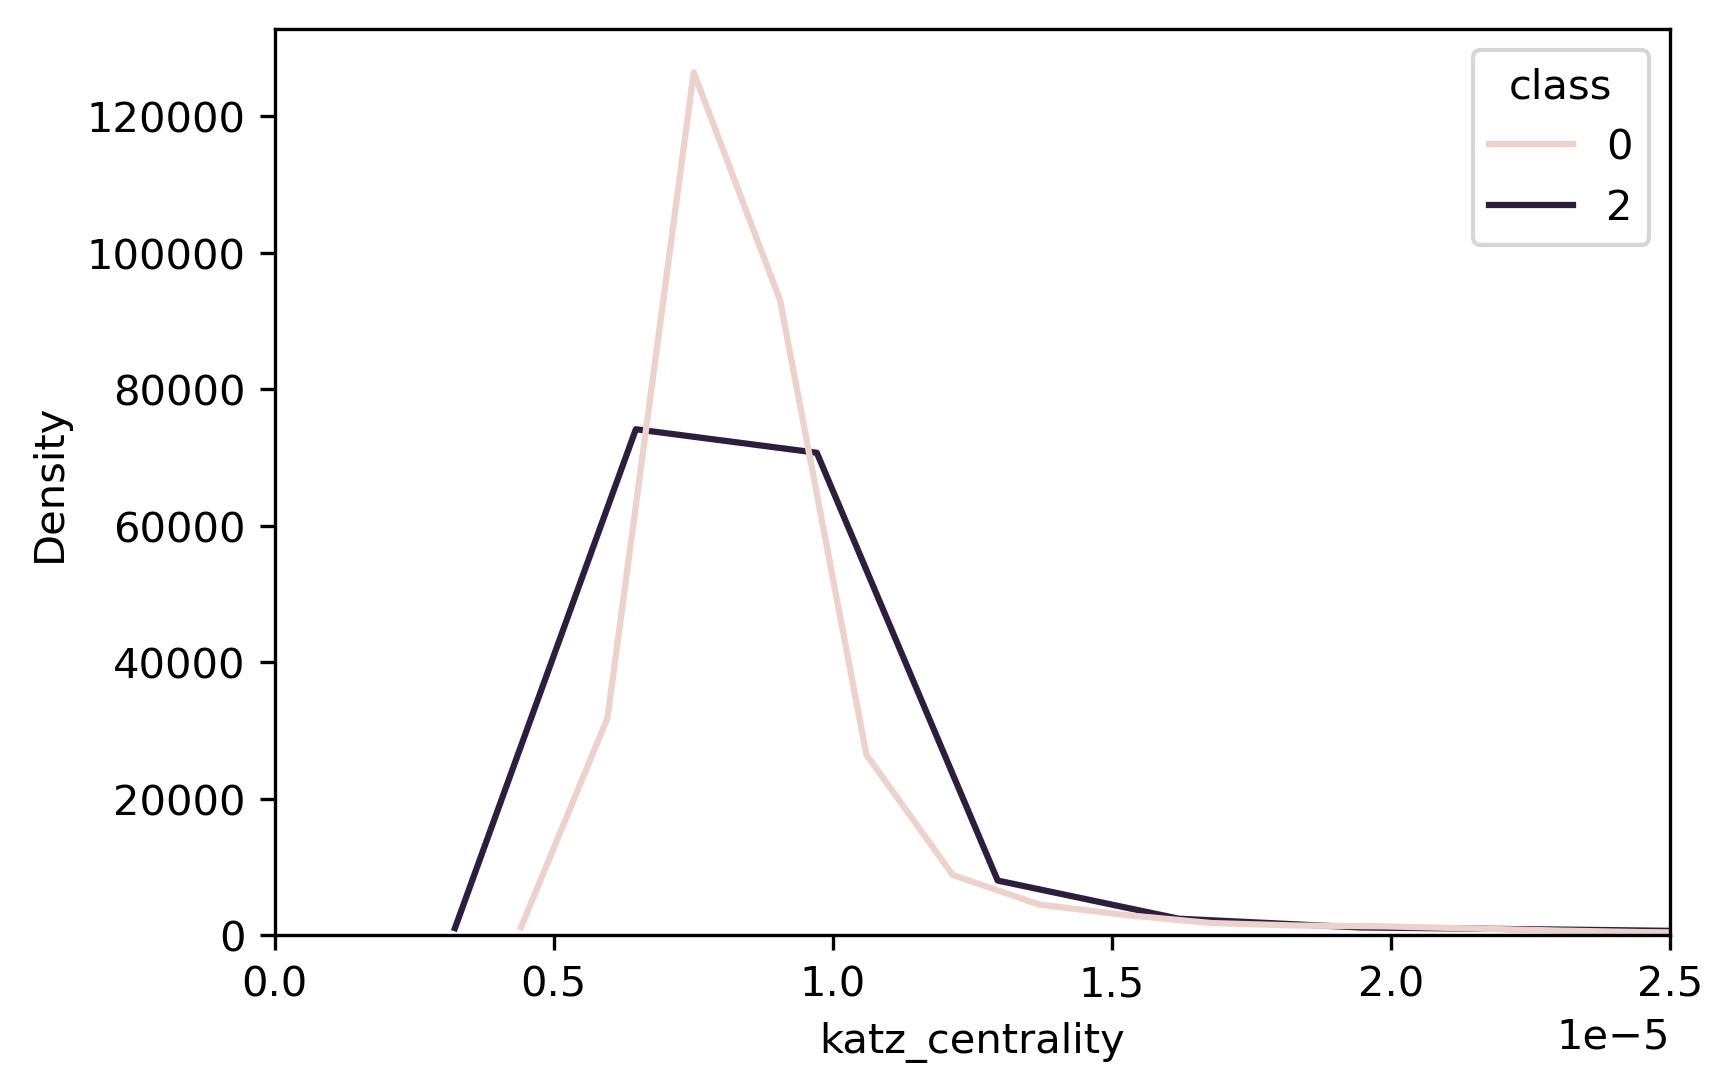

In [17]:
sns.kdeplot(data=nodes_df[nodes_df['class'] != 1], x="katz_centrality", hue="class")
plt.xlim(0, 0.000025)
# plt.ylim(None, 20)